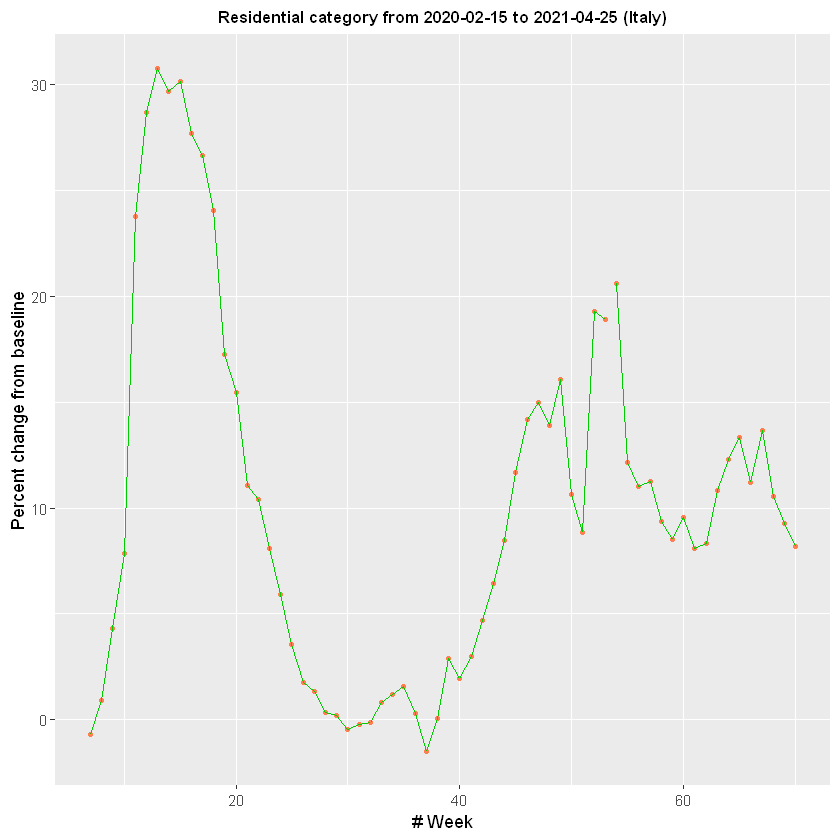

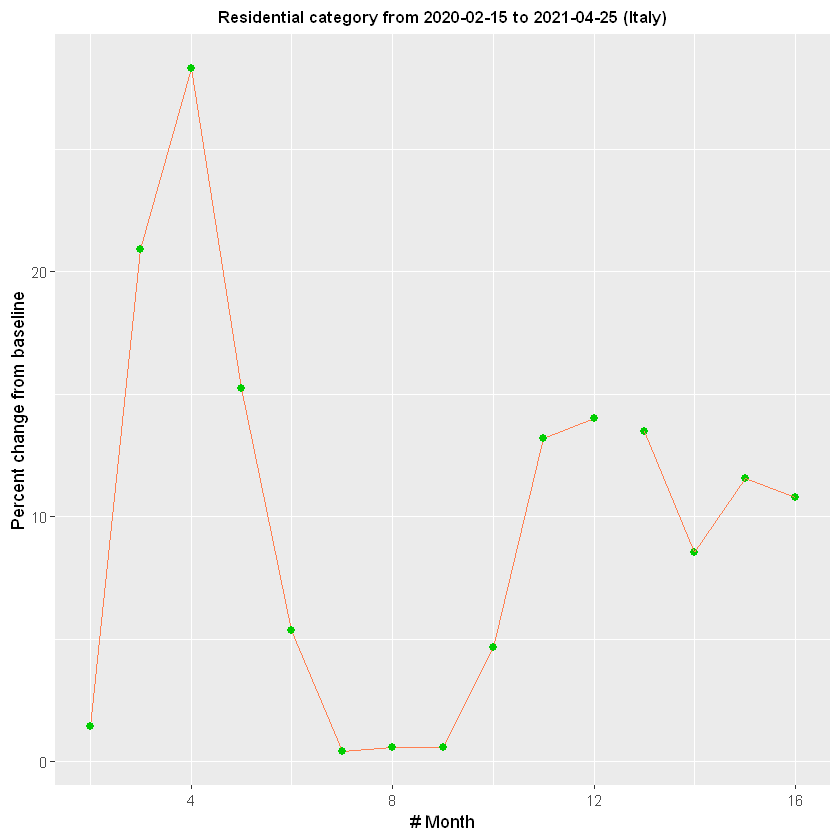

In [102]:
library(tidyverse)
library(lubridate)
library(ggplot2)

DFit1<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2020_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT1<-as_tibble(DFit1)%>%mutate("N.week"=week(date), "N.month"=month(date))
DFit2<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2021_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT2<-as_tibble(DFit2)%>%mutate("N.week"=week(date), "N.month"=month(date)) 




Iw1<-IT1 %>% group_by(N.week) %>% transmute("W"=mean(residential_percent_change_from_baseline, na.rm=TRUE))
Im1<-IT1 %>% group_by(N.month) %>% transmute("M"=mean(residential_percent_change_from_baseline, na.rm=TRUE))
Iw2<-IT2 %>% group_by(N.week) %>% transmute("W"=mean(residential_percent_change_from_baseline, na.rm=TRUE)) 
Im2<-IT2 %>% group_by(N.month) %>% transmute("M"=mean(residential_percent_change_from_baseline, na.rm=TRUE)) 

Iw2$N.week<-Iw2$N.week+53
Im2$N.month<-Im2$N.month+12


ggplot(Iw1, aes(x=N.week,y=W))+
geom_point(colour="coral", size=1)+
geom_line(colour="green3")+
xlab("# Week")+
ylab("Percent change from baseline")+
ggtitle("Residential category from 2020-02-15 to 2021-04-25 (Italy)")+
theme(plot.title = element_text(size=10, face="bold", hjust = 0.5))+
geom_point(data=Iw2, colour="coral", size=1)+
geom_line(data=Iw2, colour="green3")

ggplot(Im1, aes(x=N.month,y=M))+
geom_line(colour="coral")+
geom_point(colour="green3", size=2)+
xlab("# Month")+
ylab("Percent change from baseline")+
ggtitle("Residential category from 2020-02-15 to 2021-04-25 (Italy)")+
theme(plot.title = element_text(size=10, face="bold", hjust = 0.5))+
geom_point(data=Im2, colour="green3", size=2)+
geom_line(data=Im2, colour="coral")


In [ ]:
library(tidyverse)
library(lubridate)
library(ggplot2)

DFit1<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2020_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT1<-as_tibble(DFit1)%>%mutate("N.week"=week(date), "N.month"=month(date))
DFit2<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2021_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT2<-as_tibble(DFit2)%>%mutate("N.week"=week(date), "N.month"=month(date)) 

Categ<-list("retail_and_recreation_percent_change_from_baseline", 
            "grocery_and_pharmacy_percent_change_from_baseline", 
            "parks_percent_change_from_baseline", 
            "transit_stations_percent_change_from_baseline", 
            "workplaces_percent_change_from_baseline",
            "residential_percent_change_from_baseline")

Week<-function(z, A, B){
    w1<-A %>% group_by(N.week) %>% summarise("W"=mean(!!sym(z), na.rm=TRUE))
    w2<-B %>% group_by(N.week) %>% summarise("W"=mean(!!sym(z), na.rm=TRUE)) 
    
    w2$N.week<-w2$N.week+53
    
    length(w1[[1]])
}

Month<-function(z, A, B){
    m1<-A %>% group_by(N.month) %>% summarise("M"=mean(!!sym(z), na.rm=TRUE))
    m2<-B %>% group_by(N.month) %>% summarise("M"=mean(!!sym(z), na.rm=TRUE)) 
 
    m2$N.month<-m2$N.month+12
    
    ggplot(m1, aes(x=N.month,y=M))+
    geom_line(colour="coral")+
    geom_point(colour="green3", size=2)+
    xlab("# Month")+
    ylab("Percent change from baseline")+
    ggtitle("Residential category from 2020-02-15 to 2021-04-25 (Italy)")+
    theme(plot.title = element_text(size=10, face="bold", hjust = 0.5))+
    geom_point(data=m2, colour="green3", size=2)+
    geom_line(data=m2, colour="coral")
}


map(Categ, Week, IT1, IT2)